# Lab 03: CSS 120

In this self-paced lab, you'll get hands-on practice with the following **concepts**:

- XArray
- Climate reanalysis

### Note on hidden tests

Some of the questions in this lab will have **hidden tests**. This means that in addition to the `assert` statements you see in the code, there are *hidden* tests. The point is to check whether your code **generalizes** to other cases.

The lab will notify you when/where there is a hidden test, even if you can't see it.

### Due Date

> May 29th

## Question 01

Load:

1. `pandas`
2. `numpy`
3. `pyplot` from `matplotlib`
4. `xarray`

Using their common aliases.

In [1]:
### BEGIN SOLUTION
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
### END SOLUTION

In [2]:
assert pd and np and xr and plt

In [3]:
# Importing other packages
from datetime import timedelta
from pythia_datasets import DATASETS
import math
import cartopy.crs as ccrs

# Preamble
likely_temp_dirs = ['/tmp', 'C:\TEMP', 'C:\TMP', '\TEMP', '\TMP', '/tmp', '/var/tmp', '/usr/tmp']

# Disable warnings
import warnings
warnings.filterwarnings("ignore")

## Question 02

Find a temporary directory to download the file you are going to load.

You need to:

1. Load the package `tempfile`
2. Use the method `gettempdir` to get the temporary directory. Save the temporary directory in `tmp_dir`.

Hint: Check the `tempfile` documentation [here](https://docs.python.org/3/library/tempfile.html#tempfile.gettempdir).

In [4]:
tmp_dir = ...

In [5]:
### BEGIN SOLUTION
import tempfile
tmp_dir = tempfile.gettempdir()
### END SOLUTION

In [6]:
assert tempfile

In [7]:
assert tmp_dir in likely_temp_dirs

## Question 03

1. Load the `pooch` library.
1. Download the file <https://github.com/ProjectPythia/pythia-datasets/raw/main/data/CESM2_sst_data.nc> and save it in the temporary folder.
1. Read the file using the `xarray` function `xr.open_dataset(file_path)`. Save it in the object `ds`.

Hint: For more information on downloading a file online, adapt the following code:

```python
file_url = 'file_url_here'
file_path = pooch.retrieve(
    url = file_url, 
    known_hash = None,
    path = tmp_dir,
)
```

And to check the documentation on `pooch`, see [this webpage](https://www.fatiando.org/pooch/latest/retrieve.html)

In [8]:
ds = ...
file_url = 'https://github.com/ProjectPythia/pythia-datasets/raw/main/data/CESM2_sst_data.nc'

In [9]:
### BEGIN SOLUTION
import pooch

file_path = pooch.retrieve(
    url = file_url, 
    known_hash = None,
    path = tmp_dir,
)

ds = xr.open_dataset(file_path)
### END SOLUTION

In [10]:
# Checking
ds

<xarray.Dataset> Size: 47MB
Dimensions:    (time: 180, d2: 2, lat: 180, lon: 360)
Coordinates:
  * time       (time) object 1kB 2000-01-15 12:00:00 ... 2014-12-15 12:00:00
  * lat        (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Dimensions without coordinates: d2
Data variables:
    time_bnds  (time, d2) object 3kB ...
    lat_bnds   (lat, d2) float64 3kB ...
    lon_bnds   (lon, d2) float64 6kB ...
    tos        (time, lat, lon) float32 47MB ...
Attributes: (12/45)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   674885.0
    branch_time_in_parent:  219000.0
    case_id:                972
    ...                     ...
    sub_experiment_id:      none
    table_id:               Omon
    tracking_id:            hdl:21.14100/2975ffd3-1d7b-47e3-961a-33f212ea4eb2
    variable_id:            tos
    variant_info:           CMIP6 20th century experiments (1850-2014) with C...
    variant_label:          r11i1p1f1

In [11]:
assert pooch

In [12]:
assert file_path

In [13]:
assert ds

In [14]:
assert ds.tos.count().to_numpy() == 7648380

## Question 04

Find the minimum surface temperature during the period. Save it in the `min_temp` object.

In [15]:
min_temp = ...

In [16]:
### BEGIN SOLUTION
min_temp = ds.tos.min()
### END SOLUTION

In [17]:
# Checking
print("The minimum temperature is {}.".format(min_temp.to_numpy()))

The minimum temperature is -1.9520212411880493.


In [18]:
assert np.isclose(math.exp(min_temp), 0.1419868)

In [19]:
assert type(min_temp) == xr.core.dataarray.DataArray

## Question 05

1. Compute the median temperature over time
2. Save the result as `median_temp`
3. Plot the results

Hint: I already coded the plot for you.

In [20]:
median_temp = ...

In [21]:
### BEGIN SOLUTION
median_temp =  ds.tos.median(dim = 'time')
### END SOLUTION

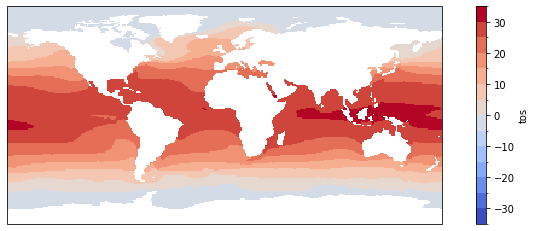

In [22]:
# Checking
median_temp.plot(
    levels = 15,
    subplot_kws = dict(projection=ccrs.PlateCarree()),
    aspect=3, size=4,
    cmap="coolwarm"
)

In [23]:
assert median_temp.coords.dims == ('lat', 'lon')

In [24]:
assert np.isclose(median_temp.sum().to_numpy(), 598050.94)

## Question 06

1. Compute the moving average of temperature, rolling for every six months. 
1. Take the mean, aggregating by `lat` and `lon`. Save it in `moving_avg`
1. Plot the result using the plotting function that I built for you

Hint: Break the operation into

1. `rolling` + `mean`
2. `mean` again

In [25]:
moving_avg = ...

In [26]:
### BEGIN SOLUTION
moving_avg = ds.tos.rolling(time = 6, center = True).mean().mean(dim = ['lat', 'lon'])
### END SOLUTION

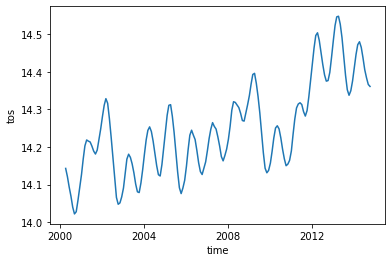

In [27]:
# Checking
moving_avg.plot()

In [28]:
assert moving_avg.isnull().sum().to_numpy() and np.isclose(moving_avg.mean().to_numpy(), 14.249936)

## Question 07

1. Compute the mean of the temperature for each month.
1. Subtract the mean from the dataset.
1. Take the mean again, aggregating on latitude and longitude.
1. Save it in `anomaly_temp`
1. Plot using the function I built.

In [29]:
anomaly_temp = ...

In [30]:
### BEGIN SOLUTION
anomaly_temp = ds.tos.groupby("time.month") - ds.tos.groupby("time.month").mean(dim = 'time')
anomaly_temp = anomaly_temp.mean(dim = ['lat', 'lon'])
### END SOLUTION

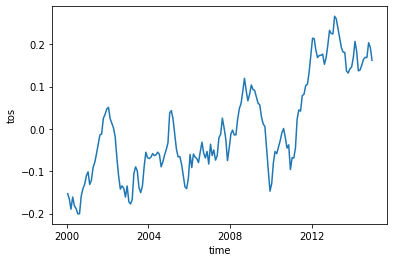

In [31]:
# Checking it
anomaly_temp.plot()

In [32]:
assert np.isclose(anomaly_temp.std().to_numpy(), 0.11701617)

## Question 08

1. Compute the season mean of the temperature
1. Save the results in `season_means`
1. Plot the results in four plots, one for each season

In [33]:
season_means = ...

In [34]:
### BEGIN SOLUTION
season_means = ds.tos.groupby("time.season").mean()
### END SOLUTION

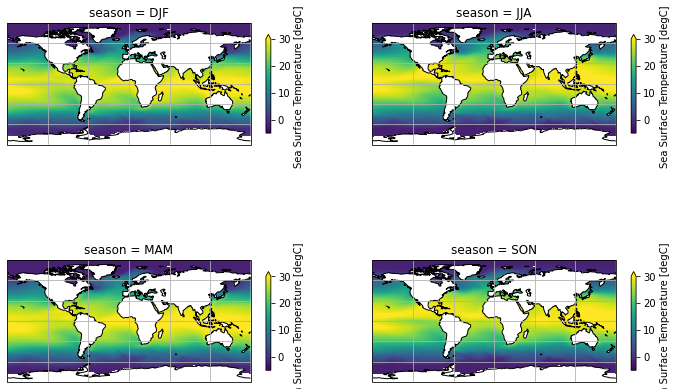

In [35]:
# Checking it
fig, axs = plt.subplots(
    nrows=2, ncols=2, 
    subplot_kw={"projection": ccrs.PlateCarree()}, 
    figsize=(12, 8)
)
axs = axs.flatten()

# Loop over seasons
for i, seas in enumerate(['DJF', 'JJA', 'MAM', 'SON']):
    axs[i].coastlines()
    axs[i].gridlines()
    season_means.sel(season = seas).plot(
        ax = axs[i],
        transform = ccrs.PlateCarree(),
        vmin = -5,
        vmax = 30,
        cbar_kwargs = dict(shrink=0.5),
    )

In [36]:
assert np.isclose(season_means.std().to_numpy(), 11.76266098)

### Great work!